In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os
import pathlib
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
from src import utils

nodes, edges = utils.load_data()
nodes.drop(columns=['Label'], inplace=True)
nodes


,Id
0,visitorfi5kl7q7i
1,uisspxbl7ipc5bet
2,directoryvi6plzm
3,telnetg42y5crrb7
4,gl75awtvsmp2ofe6
...,...
7173,4co7hns6t7qt22ix
7174,mwprbruk4sc5t4li
7175,vysoofjtouvo2bl3
7176,lxvfo33z43yd6piu


In [3]:
edges.drop(columns=['Type'], inplace=True)
edges

,Source,Target,Weight
0,visitorfi5kl7q7i,uisspxbl7ipc5bet,1
1,visitorfi5kl7q7i,xidp5a5k3rlxr5r3,1
2,visitorfi5kl7q7i,7uvijlsswycvih2p,1
3,visitorfi5kl7q7i,4oy7nsv57l3ragqz,1
4,visitorfi5kl7q7i,prometh5th5t5rfd,1
...,...,...,...
25099,jzsm6raa2iw3hkue,tt3j2x4k5ycaa5zt,1
25100,3prjgaibgjpkkknu,tt3j2x4k5ycaa5zt,3
25101,grams5ieqi6zi3n7,toradsc6vvmtugty,1
25102,ijb7rxextmnhkd76,torvps7kzis5ujfz,3


In [4]:
G = nx.from_pandas_edgelist(edges, 'Source', 'Target', create_using=nx.DiGraph())
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 7178
Number of edges: 25104


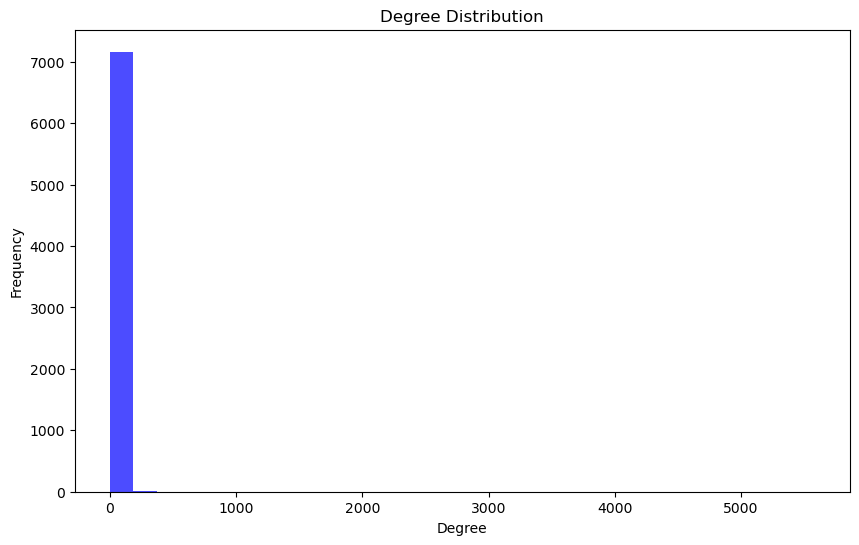

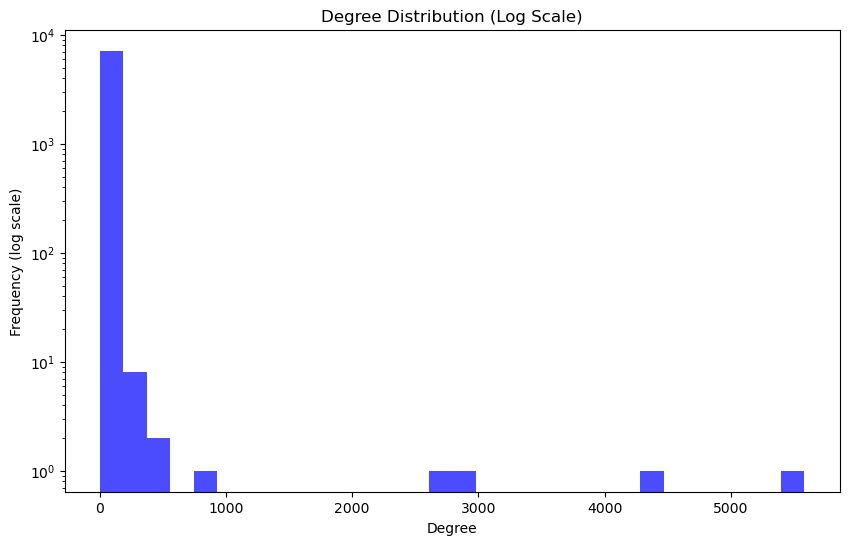

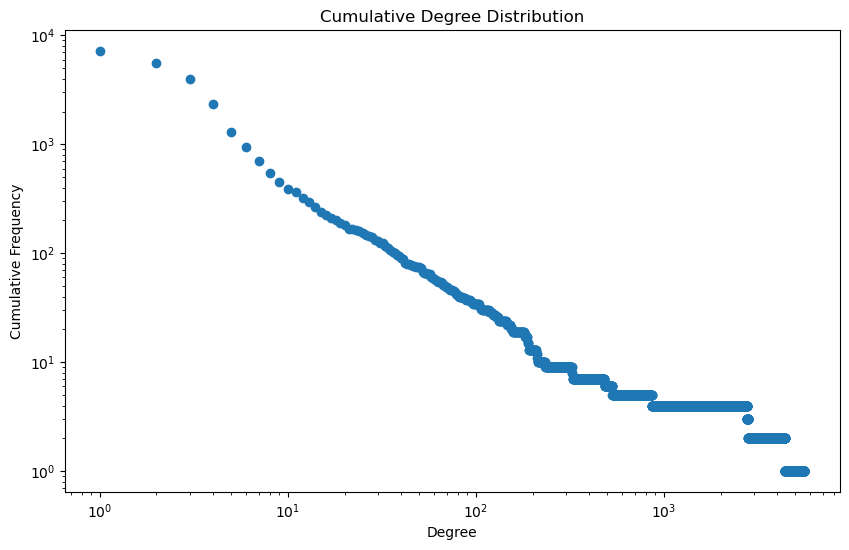

In [5]:
#degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10,6))
plt.hist(degrees, bins=30, color='blue', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

#now on log scale
plt.figure(figsize=(10,6))
plt.hist(degrees, bins=30, color='blue', alpha=0.7, log=True)
plt.title('Degree Distribution (Log Scale)')
plt.xlabel('Degree')
plt.ylabel('Frequency (log scale)')
plt.show()

#cumulative degree distribution
degree_counts = np.bincount(degrees)
cumulative_counts = np.cumsum(degree_counts[::-1])[::-1]
plt.figure(figsize=(10,6))
plt.loglog(range(len(cumulative_counts)), cumulative_counts, marker='o', linestyle='none')
plt.title('Cumulative Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Cumulative Frequency')
plt.show()

In [6]:
#centrality measures (betweenness centrality, closeness centrality)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
print("Top 10 nodes by Betweenness Centrality:")
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_betweenness:
    print(f"Node: {node}, Betweenness Centrality: {centrality:.4f}")
    
print("Top 10 nodes by Closeness Centrality:")
top_betweenness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]
for node, centrality in top_betweenness:
    print(f"Node: {node}, Closeness Centrality: {centrality:.4f}")


Top 10 nodes by Betweenness Centrality:
Node: visitorfi5kl7q7i, Betweenness Centrality: 0.0186
Node: torvps7kzis5ujfz, Betweenness Centrality: 0.0155
Node: skunksworkedp2cg, Betweenness Centrality: 0.0148
Node: w363zoq3ylux5rf5, Betweenness Centrality: 0.0105
Node: kpynyvym6xqi7wz2, Betweenness Centrality: 0.0070
Node: tmskhzavkycdupbr, Betweenness Centrality: 0.0069
Node: tt3j2x4k5ycaa5zt, Betweenness Centrality: 0.0061
Node: torlinkbgs6aabns, Betweenness Centrality: 0.0048
Node: shopsat2dotfotbs, Betweenness Centrality: 0.0045
Node: lchudifyeqm4ldjj, Betweenness Centrality: 0.0033
Top 10 nodes by Closeness Centrality:
Node: fhostingesps6bly, Closeness Centrality: 0.0274
Node: blockchainbdgpzk, Closeness Centrality: 0.0171
Node: grams7enufi7jmdl, Closeness Centrality: 0.0165
Node: toradsc6vvmtugty, Closeness Centrality: 0.0162
Node: torbox3uiot6wchz, Closeness Centrality: 0.0160
Node: 3g2upl4pq6kufc4m, Closeness Centrality: 0.0159
Node: pwoah7foa6au2pul, Closeness Centrality: 0.0159
N

In [7]:
Global_clusetering = nx.transitivity(G)
print(Global_clusetering)
avg_clustering = nx.average_clustering(G)
print(avg_clustering)
local_clustering = nx.clustering(G)
local_clustering  

0.0009640276195779557
0.5061385777512977


{'visitorfi5kl7q7i': 0.001222910292411277,
 'uisspxbl7ipc5bet': 0.8333333333333334,
 'xidp5a5k3rlxr5r3': 0.6666666666666666,
 '7uvijlsswycvih2p': 0.5833333333333334,
 '4oy7nsv57l3ragqz': 1.0,
 'prometh5th5t5rfd': 0.25146198830409355,
 'bdpuqvl2ksq2vzs3': 0.8333333333333334,
 'yipeptidsl75eri7': 0.8333333333333334,
 'lubzpslfl3nnvqzn': 0.8333333333333334,
 '22ozauzmrn3zxkog': 0.8333333333333334,
 'imb27556jpb6g65j': 0.6666666666666666,
 'phmsga42i3bom7xu': 1.0,
 'yowlss6f6fvpd4e6': 1.0,
 'udsmewv45lunzoo4': 0.11224489795918367,
 'h4ca2an267okpa5m': 0.6666666666666666,
 'iwxicbrknwnl4qyl': 0.8333333333333334,
 'palantirbhqyufyu': 0.75,
 'q2sg67ft4cdvjlfv': 0.6666666666666666,
 'nr25kb2m2jurpd5e': 0.8333333333333334,
 'jpre3ta3x2csggd4': 0.6666666666666666,
 'dollarseraw6lxja': 0.75,
 'helpu2ov4khcxtyi': 0.36666666666666664,
 'entropisth3ctkzd': 0.75,
 'gkgwhrau5yejzizo': 0.8333333333333334,
 'ovc2s56sxugqfabg': 0.75,
 'artsmankindxgcv5': 0.4027777777777778,
 'xilliayhoiuv5qmk': 0.3923076